# Actividad para evaluación de 3er parcial

Dado lo aprendido a lo largo del semestre durante la materia (python, grafos, interpretación y análisis de conectividad)

El 3er parcial se evaluará a través de la actividad:
__Aplicación y análisis a un dataset__

__Dataset a utilizar__: https://physionet.org/content/eegmmidb/1.0.0/S001/#files-panel

# Rúbrica para evaluación de 3er parcial

Se evaluará:
- Que el script no contenga errores
- Que los resultados del script sean reproducibles, ie que puedan ser reproducibles en cualquier computadora
- El orden del código
- La lógica del código
- La *inferencia* empleada para los parámetros utilizados, tales como thresholds para filtrado de matriz, elección de thresholds para selección de alguna banda específica (alfa, beta, delta, etc.) 
- Los métodos utilizados, ie, si para construir la matriz de conectividad se utilizó coherencia espectral, PLV o correlación, que haya una razón de ello
- Los resultados mostrados, tales como mapas de calor, grafos 2D, grafos 3D, el mostrar comunidades, hubs, nodos proporcionales al grado, filtrado de matriz de
- Conclusión del análisis, ie, al finalizar el análisis dar una conclusión que resuma los resultados encontrados con una interpretación de los mismos
- Que el análisis haya sido aplicado a cada uno de los ensayos/archivos del dataset

In [91]:
#Ensayo 3 y 4
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from mi_modulo import *

In [92]:
ensayo3_excel=r"C:\Users\mafig\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel=r"C:\Users\mafig\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx"
coordenadas_csv=r"C:\Users\mafig\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"
ensayo3_dict=pd.read_excel(ensayo3_excel,sheet_name=None, index_col=0)
ensayo4_dict=pd.read_excel(ensayo4_excel,sheet_name=None, index_col=0)


In [93]:
ensayos3_dfs= lista_dfs(ensayo3_dict)

NameError: name 'ensayo3_dict' is not defined

In [5]:
ensayo3_dict.keys()

dict_keys(['Sujeto1', 'Sujeto2', 'Sujeto3', 'Sujeto4', 'Sujeto5', 'Sujeto6', 'Sujeto7', 'Sujeto8', 'Sujeto9', 'Sujeto10', 'Sujeto11', 'Sujeto12', 'Sujeto13', 'Sujeto14', 'Sujeto15', 'Sujeto16', 'Sujeto17', 'Sujeto18', 'Sujeto19', 'Sujeto20', 'Sujeto21', 'Sujeto22', 'Sujeto23', 'Sujeto24', 'Sujeto25', 'Sujeto26', 'Sujeto27', 'Sujeto28', 'Sujeto29', 'Sujeto30', 'Sujeto31', 'Sujeto32', 'Sujeto33', 'Sujeto34', 'Sujeto35', 'Sujeto36', 'Sujeto37', 'Sujeto38', 'Sujeto39', 'Sujeto40', 'Sujeto41', 'Sujeto42', 'Sujeto43', 'Sujeto44', 'Sujeto45', 'Sujeto46', 'Sujeto47', 'Sujeto48', 'Sujeto49', 'Sujeto50', 'Sujeto51', 'Sujeto52', 'Sujeto53', 'Sujeto54', 'Sujeto55', 'Sujeto56', 'Sujeto57', 'Sujeto58', 'Sujeto59', 'Sujeto60', 'Sujeto61', 'Sujeto62', 'Sujeto63', 'Sujeto64', 'Sujeto65', 'Sujeto66', 'Sujeto67', 'Sujeto68', 'Sujeto69', 'Sujeto70', 'Sujeto71', 'Sujeto72', 'Sujeto73', 'Sujeto74', 'Sujeto75', 'Sujeto76', 'Sujeto77', 'Sujeto78', 'Sujeto79', 'Sujeto80', 'Sujeto81', 'Sujeto82', 'Sujeto83', 'S

In [6]:
ensayos_dfs= []
for sujetos in ensayo3_dict.keys():
    ensayos_dfs.append(ensayo3_dict[sujetos]) # lista de datafranes del ensayo 3 con cada sujeto

In [12]:
ensayos4_dfs= []
for sujetos in ensayo4_dict.keys():
    ensayos4_dfs.append(ensayo4_dict[sujetos]) # lista de datafranes del ensayo 3 con cada sujeto

# Filtrado de matrices


In [16]:
threshold=0.5
porcentaje= 0.6
def  capsula(lista_dfs,th,porcentaje):
    #Conjuntamos las matrices
    stack=np.stack([df.values for df in lista_dfs])
    above= stack > th
    #Aplicamos filtro a cada matriz
    N= len(lista_dfs)
    count_above= above.sum(axis=0) #Contando cuantos valores superan el umbral en celda
    
    min_requerido= int(np.ceil(porcentaje*N)) 
    # con esto bastara con quedarnos con las celdas de 'above' que cumplan con miin_requerido
    # para así tener el número de sujetos que superan el umbral
    result_bool=count_above>= min_requerido
    result_df=pd.DataFrame(result_bool,
                           index=lista_dfs[0].index,
                          columns=lista_dfs[0].columns).astype(int)
    return result_df


In [17]:
resultado3_df=capsula(ensayos_dfs,0.5,0.6
resultado4_df=capsula(ensayos_dfs,0.5,0.6)

<Axes: >

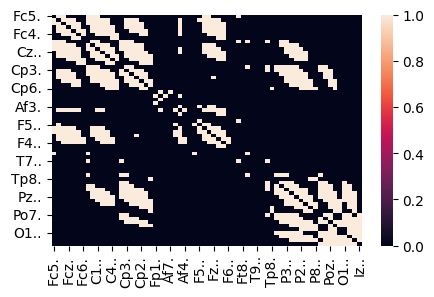

In [18]:
plt.figure(figsize=(5,3))
sns.heatmap(resultado_df)

## Generar estadísticos para decidir umbrales

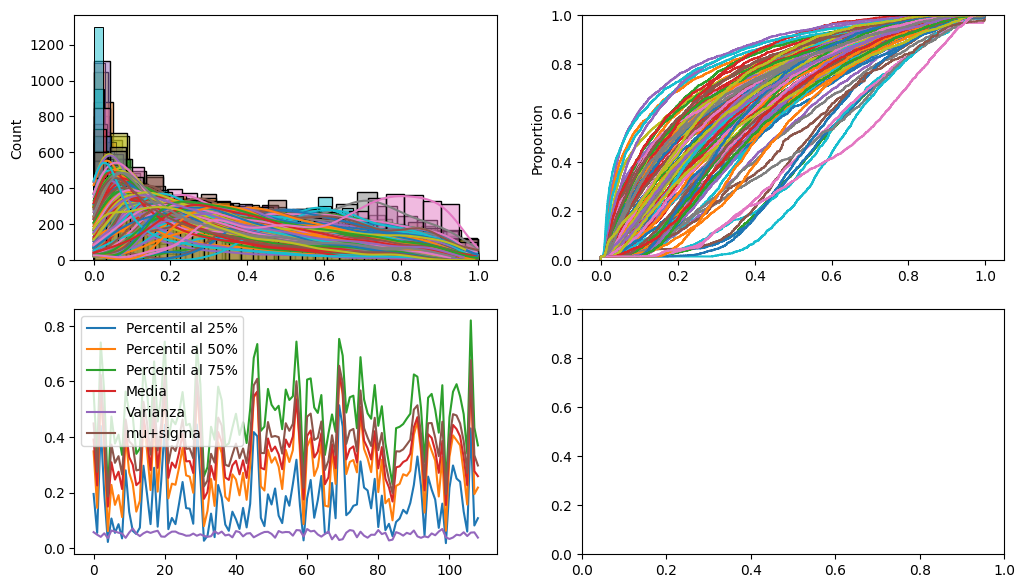

In [34]:
ensayos_dfs

th25,th50,th75, promedio, varianza= [],[],[],[],[]
mu_sigma=[]
fid, axes=plt.subplots(2,2, figsize=(12,7))
for sujeto in ensayos3_dfs:
    #Cálculo de estadísticos
    data=sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data)+np.var(data))
    #Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
    
axes[1][0].plot(th25,label='Percentil al 25%')
axes[1][0].plot(th50,label='Percentil al 50%')
axes[1][0].plot(th75,label='Percentil al 75%')
axes[1][0].plot(promedio,label='Media')
axes[1][0].plot(varianza,label='Varianza')
axes[1][0].plot(mu_sigma,label='mu+sigma')
axes[1][0].legend()

In [57]:
estadisticos_df=pd.DataFrame(np.random.randint(4,5),columns=['th25','th50','th75','promedio','mu_sigma'],index=['min','max','mediana','mu_sigma'])
columnas=[ th25, th50, th75, promedio, mu_sigma]
for i in range(len(columnas)):
    estadisticos_df.iloc[0,i]= np.min(columnas[i])
    estadisticos_df.iloc[1,i]= np.max(columnas[i])
    estadisticos_df.iloc[2,i]= np.median(columnas[i])
    estadisticos_df.iloc[3,i]= np.mean(columnas[i])

estadisticos_df

C:\Users\mafig\AppData\Local\Temp\ipykernel_12904\133616485.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.018412840307211815' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  estadisticos_df.iloc[0,i]= np.min(columnas[i])
C:\Users\mafig\AppData\Local\Temp\ipykernel_12904\133616485.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.06175027830984453' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  estadisticos_df.iloc[0,i]= np.min(columnas[i])
C:\Users\mafig\AppData\Local\Temp\ipykernel_12904\133616485.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.19686677754583148' has dtype incompatible with int64, please explicitly cast to a compatible dtype

,th25,th50,th75,promedio,mu_sigma
min,0.018413,0.061750,0.196867,0.149821,0.186222
max,0.514472,0.674805,0.819681,0.626848,0.676548
mediana,0.144574,0.273808,0.484181,0.327700,0.389466
mu_sigma,0.166961,0.295352,0.489628,0.345504,0.396340


,th25,th50,th75,promedio,mu_sigma
min,0.018413,0.061750,0.196867,0.149821,0.186222
max,0.514472,0.674805,0.819681,0.626848,0.676548
mediana,0.144574,0.273808,0.484181,0.327700,0.389466
promedio,0.166961,0.295352,0.489628,0.345504,0.396340


Text(0.5, 1.0, 'umbral=0.2, población>60%')

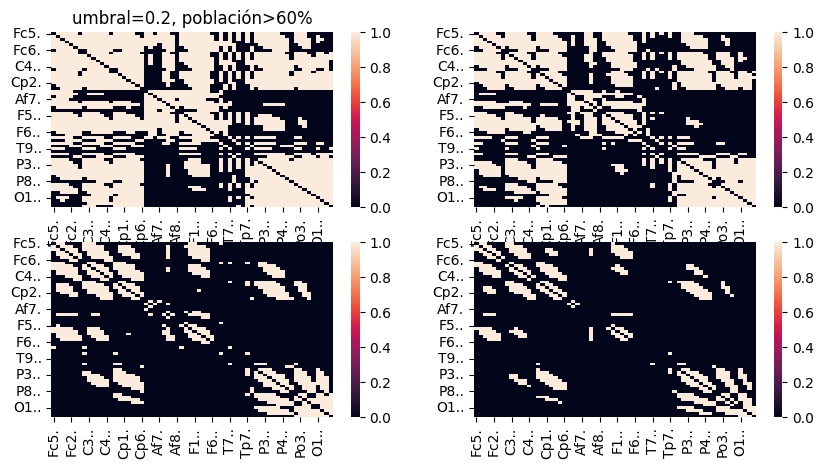

In [23]:
result_df1=capsula(ensayos_dfs,0.2,0.6)
result_df2=capsula(ensayos_dfs,0.3,0.6)
result_df3=capsula(ensayos_dfs,0.5,0.6)
result_df4=capsula(ensayos_dfs,0.6,0.6)


fig,axes=plt.subplots(2,2,figsize=(10,5))

sns.heatmap(result_df1,ax=axes[0,0])
sns.heatmap(result_df2,ax=axes[0,1])
sns.heatmap(result_df3,ax=axes[1,0])
sns.heatmap(result_df4,ax=axes[1,1])

axes[0,0].set_title('umbral=0.2, población>60%')

Text(0.5, 1.0, 'umbral=0.3, población>50%')

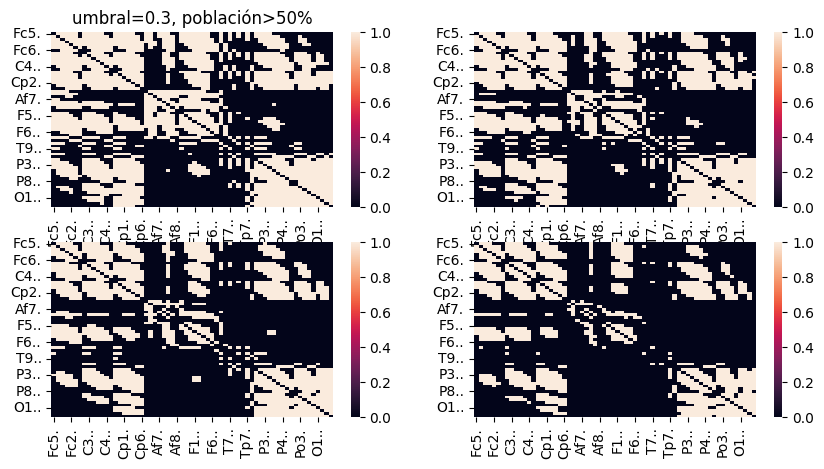

In [25]:
result_df1=capsula(ensayos_dfs,0.3,0.5)
result_df2=capsula(ensayos_dfs,0.3,0.6)
result_df3=capsula(ensayos_dfs,0.3,0.7)
result_df4=capsula(ensayos_dfs,0.3,0.8)


fig,axes=plt.subplots(2,2,figsize=(10,5))

sns.heatmap(result_df1,ax=axes[0,0])
sns.heatmap(result_df2,ax=axes[0,1])
sns.heatmap(result_df3,ax=axes[1,0])
sns.heatmap(result_df4,ax=axes[1,1])

axes[0,0].set_title('umbral=0.3, población>50%')

# Generación de resultados
Despues del analisis realizado, utilizando los mapas de calor, para poder escoger un threshold adecaudo y un porcentaje de la población que cumpla dicho umbral; se procederá a generar los resultados

Resultados a generar:
- Grafo2D
- Grafo3D
- Métricas de l grafi
- Gráfico de comunidades con hub

In [ ]:
#convertir de dataframe a grafo
ensayo3_grafo_=nx.from_pandas_adjacency(resultado3_df3)
ensayo4_grafo_=nx.from_pandas_adjacency(resultado4_df1)



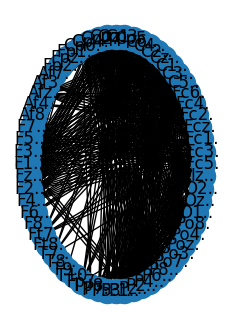

In [67]:
# Grafo 2
def grafo2D(df,pos):
    ensayo_grafo=nx.from_pandas_adjacency(df)
    nx.draw_circular(ensayo_grafo, with_labels=True,ax=pos)

    return ensayo_grafo

In [55]:
def metricas_grafo(G):
    #Metricas:
    # Cluster promedio
    clust_coeff= nx.average_clustering(G)
    # Longitud de camino promedio(camino más corto)
    # (b) Longitud de camino promedio (camino más corto)
    try:
        path_length = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        path_length = np.nan  # red no conexa
    # Mundo pequeño
    # Comparar con grafo aleaatorio de igual N,K
    G_rand=nx.gnm_random_graph(n=G.number_of_nodes(), m=G.number_of_edges())
    clust_rand= nx.average_clustering(G_rand)
    path_rand= nx.average_shortest_path_length(G_rand)
    small_world_sigma= (clust_coeff/clust_rand)/(path_length/path_rand)
    #Modularidad
    # (d) Modularidad — usando método de comunidades
    from networkx.algorithms import community
    communities = community.greedy_modularity_communities(G)
    modularity = community.modularity(G, communities)
    
    # (e) Hubs — grado, centralidad de intermediación
    degree_dict = dict(G.degree())
    betweenness = nx.betweenness_centrality(G)
    betwenness= sorted(betweenness.items(),key=lambda x: x[1],reverse=True)
    
    # (f) Eficiencia global y local
    global_eff = nx.global_efficiency(G)
    local_eff = nx.local_efficiency(G)

    return (clust_coeff, path_length,small_world_sigma,communities,modularity,betwenness,global_eff,local_eff,degree_dict)

In [33]:
metricas_grafo(ensayo_grafo)

(0.6233393263554781,
 nan,
 nan,
 [frozenset({'C5..',
             'Cp1.',
             'Cp2.',
             'Cp3.',
             'Cp4.',
             'Cp5.',
             'Cp6.',
             'Ft7.',
             'Iz..',
             'O1..',
             'O2..',
             'Oz..',
             'P1..',
             'P2..',
             'P3..',
             'P4..',
             'P5..',
             'P6..',
             'P7..',
             'P8..',
             'Po3.',
             'Po4.',
             'Po7.',
             'Po8.',
             'Poz.',
             'Pz..',
             'T7..',
             'T9..',
             'Tp7.',
             'Tp8.'}),
  frozenset({'Af3.',
             'Af4.',
             'Af7.',
             'Afz.',
             'C1..',
             'C2..',
             'C3..',
             'C4..',
             'C6..',
             'Cpz.',
             'Cz..',
             'F1..',
             'F2..',
             'F3..',
             'F4..',
             'F5..',

In [34]:
(clust_coeff_, path_length_,small_world_sigma_,communities_,modularity_,betwenness_,global_eff_,local_eff_,degree_dict_)=metricas_grafo(ensayo_grafo)

In [54]:
#Construcción de dataframe de coordenadas
eeg_coords=pd.read_csv(coordenadas_csv)
eeg_coords.set_index('canal',drop=True, inplace=True)

In [ ]:
eeg_coords.loc['Fc5.','y']

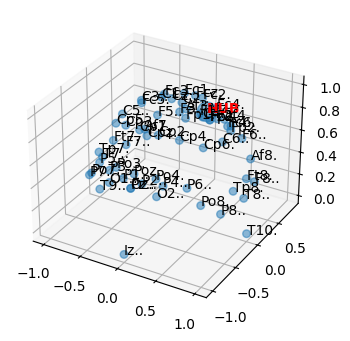

In [59]:


def grafo3D(coords,Hub,pos):
    x, y, z = coords['x'].values, coords['y'].values, coords['z'].values
    nodes_size = [30 if idx != Hub[0] else 200 for idx in coords.index]
    pos.scatter(x, y, z, alpha=0.5, s=nodes_size)
    for idx, (x_, y_, z_) in enumerate(zip(x, y, z)):
        pos.text(x_, y_, z_, coords.index[idx], fontsize=10)
        if coords.index[idx] == Hub[0]:
            pos.text(x_, y_, z_, 'HUB', color='red', fontweight='bold', fontsize=10)

hub = betwenness_[0]

fig = plt.figure(figsize=(4, 4))
axes = [fig.add_subplot(1, 1, 1, projection='3d')]



In [47]:
# Grafo de comunidades
comunidad_prueba= communities_[2]
#n1, n2 =list(comunidad_prueba)[0],list(comunidad_prueba)[1]

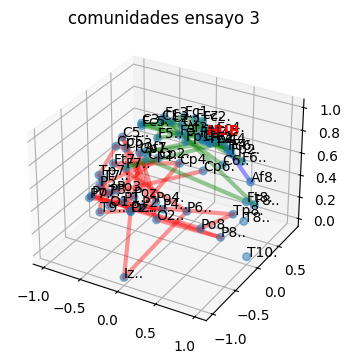

In [58]:

hub = betwenness_[0]
def grafo_comunidades(comunidades,Hub,coords,pos):
    x, y, z = coords['x'].values, coords['y'].values, coords['z'].values
    
    nodes_size = [30 if idx != Hub[0] else 200 for idx in coords.index]
    pos.scatter(x, y, z, alpha=0.5, s=nodes_size)
    for idx, (x_, y_, z_) in enumerate(zip(x, y, z)):
        pos.text(x_, y_, z_, coords.index[idx], fontsize=10)
        if coords.index[idx] == Hub[0]:
            pos.text(x_, y_, z_, 'HUB', color='red', fontweight='bold', fontsize=10)
    
    colores=['red','green','blue','black','orange']
    for n_comunidad,comunidad in enumerate(comunidades):
        for idx in range(len(comunidad)-1):
            n1,n2= list(comunidad)[idx], list(comunidad)[idx+1]
            x_=[coords.loc[n1,'x'],coords.loc[n2,'x']]
            y_=[coords.loc[n1,'y'],coords.loc[n2,'y']]
            z_=[coords.loc[n1,'z'],coords.loc[n2,'z']]
            pos.plot(x_,y_,z_, linewidth=3,alpha=0.4, color=colores[n_comunidad])
    pos.set_title('comunidades ensayo 3')

# Grafo de comunidades

fig=plt.figure(figsize=(4,4))
axes= [fig.add_subplot(1,1,1,projection='3d')]


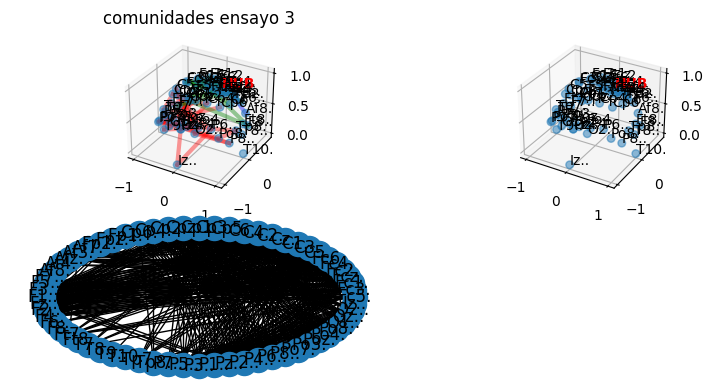

In [69]:
hub=betwenness_[0]

fig=plt.figure(figsize=(8,4))
axes= [fig.add_subplot(2,2,1,projection='3d'),
      fig.add_subplot(2,2,2,projection='3d'),
      fig.add_subplot(2,2,3)]

grafo3D(eeg_coords,hub,axes[1])
grafo_comunidades(communities_,hub,eeg_coords,axes[0])
ensayo_grafo=grafo2D(result_df3,axes[2])
plt.tight_layout()


# 
Leer datos
generar listas de dataframes
compactar a 1 dataframe
- hacer analisis sobre umbrales por ensayo
analizamos resultado con mapa de calor
observamos resultado en grafo 2D
observamos resultado cen grafo 3D

Conocimiento previo
Analísis de literatura
Lógica